# Objetivo: Predecir el fallo de una red

In [1]:
# Librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# Leer datos
train = pd.read_csv('telstra-recruiting-network/train.csv')
test = pd.read_csv('telstra-recruiting-network/test.csv')
severity_type = pd.read_csv('telstra-recruiting-network/severity_type.csv')
resource_type = pd.read_csv('telstra-recruiting-network/resource_type.csv')
log_feature = pd.read_csv('telstra-recruiting-network/log_feature.csv')
event_type = pd.read_csv('telstra-recruiting-network/event_type.csv')

# Entendiendo los datos: Inspeccionar conjunto de datos

In [3]:
train.head(), train.describe()

(      id  location  fault_severity
 0  14121       118               1
 1   9320        91               0
 2  14394       152               1
 3   8218       931               1
 4  14804       120               0,
                  id     location  fault_severity
 count   7381.000000  7381.000000      7381.00000
 mean    9264.649099   624.313779         0.45021
 std     5349.290176   320.622091         0.66656
 min        1.000000     1.000000         0.00000
 25%     4647.000000   374.000000         0.00000
 50%     9222.000000   665.000000         0.00000
 75%    13885.000000   893.000000         1.00000
 max    18550.000000  1126.000000         2.00000)

In [4]:
test.head(), test.describe()

(      id  location
 0  11066       481
 1  18000       962
 2  16964       491
 3   4795       532
 4   3392       600,
                  id      location
 count  11171.000000  11171.000000
 mean    9284.330230    623.055769
 std     5360.065369    322.137234
 min        2.000000      1.000000
 25%     4630.000000    373.000000
 50%     9316.000000    676.000000
 75%    13926.000000    893.000000
 max    18552.000000   1125.000000)

In [5]:
severity_type.head(), severity_type.describe()

(     id  severity_type
 0  6597              2
 1  8011              2
 2  2597              2
 3  5022              1
 4  6852              1,
                  id  severity_type
 count  18552.000000   18552.000000
 mean    9276.500000       1.649795
 std     5355.645433       0.773591
 min        1.000000       1.000000
 25%     4638.750000       1.000000
 50%     9276.500000       2.000000
 75%    13914.250000       2.000000
 max    18552.000000       5.000000)

In [6]:
resource_type.head(), resource_type.describe()

(     id   resource_type
 0  6597               8
 1  8011               8
 2  2597               8
 3  5022               8
 4  6852               8,
                  id   resource_type
 count  21076.000000    21076.000000
 mean    9255.869330        5.279987
 std     5366.730222        2.924911
 min        1.000000        1.000000
 25%     4599.750000        2.000000
 50%     9256.500000        7.000000
 75%    13907.250000        8.000000
 max    18552.000000       10.000000)

In [7]:
log_feature.head(), log_feature.describe()

(     id  log_feature  volume
 0  6597           68       6
 1  8011           68       7
 2  2597           68       1
 3  5022          172       2
 4  5022           56       1,
                  id   log_feature        volume
 count  58671.000000  58671.000000  58671.000000
 mean    9271.368905    209.092465      9.685296
 std     5355.142878     93.066417     27.314433
 min        1.000000      1.000000      1.000000
 25%     4658.500000    134.000000      1.000000
 50%     9275.000000    227.000000      2.000000
 75%    13903.000000    307.000000      7.000000
 max    18552.000000    386.000000   1310.000000)

In [8]:
event_type.head(),event_type.describe()

(     id   event_type
 0  6597           11
 1  8011           15
 2  2597           15
 3  5022           15
 4  5022           11,
                  id    event_type
 count  31170.000000  31170.000000
 mean    9267.735258     24.740680
 std     5363.817181     12.152183
 min        1.000000      1.000000
 25%     4625.250000     11.000000
 50%     9287.500000     23.000000
 75%    13915.000000     35.000000
 max    18552.000000     54.000000)

In [9]:
#train.isna().describe()           # no exiten registros con locación vacía
#severity_type.isna().describe()   # no exiten registros con locación vacía
#event_type.isna().describe()      # no exiten registros con locación vacía
#log_feature.isna().describe()     # no exiten registros con locación vacía
#resource_type.isna().describe()   # no exiten registros con locación vacía

In [10]:
#train.isna().describe()           # no exiten registros con locación vacía
#len(severity_type.id.unique())    # no exiten registros con locación vacía
#len(event_type.id.unique())       # no exiten registros con locación vacía
#len(log_feature.id.unique())      # no exiten registros con locación vacía
#len(resource_type.id.unique())    # no exiten registros con locación vacía

In [11]:
# Veamos como se distribuyen los 'fault_severity' y veamoslo visualmente
print(train.groupby('fault_severity').size())

fault_severity
0    4784
1    1871
2     726
dtype: int64


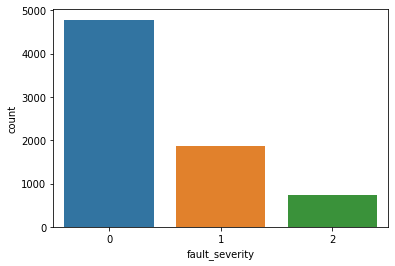

In [12]:
import seaborn as sns
sns.countplot(train['fault_severity'],label="Count")
plt.show()

In [13]:
# Después de inspeccionar la base de datos, surguen las siguinete cuestiones:

#   ¿Existe alguna relación directa entre la "locación" y la #gravedad de la falla",
#   es decir, hay locaciones dónde se presenten fallas de gravedad independientemente de las otras variables?
#  
#   ¿Relacionando todas las variables a un mismo id, se puede entrenar un modelo de predicción que 
#   describa los datos en test?
#   ¿Qué modelo es el que mejor describe, que utilizamos para deteminar que tan bien predice el modelo?
#   ¿Cuáles variables se deben seleccionar?
#
#   Al tomar en cuenta más variables, en la tabla de "test" se debe de ampliar para que contenga las variables
#   a considedad, de otra manera el modelo no podra predecir utilizando tales variables.
#
#   ¿Cuál es la mejor forma de abortar la solución a estas cuentiones?


In [14]:
# Investigando sobre una posible relación entre "location" y "fault_severity"
r=train.groupby(['location']).mean()
r=r[['fault_severity']]

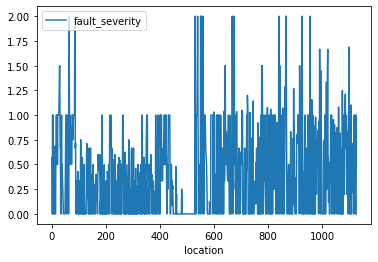

In [15]:
r.plot()

In [16]:
# Veamos la distribución de los "fault_severity" sobre "location"

locations=train.location.unique()
len(locations)

929

In [17]:
k=[]
for e in range(0,len(locations)):
    dat=train[ train['location']==locations[e] ]
    dat_0 = dat[ dat['fault_severity'] == 0 ].fault_severity.count()
    dat_1 = dat[ dat['fault_severity'] == 1 ].fault_severity.count()
    dat_2 = dat[ dat['fault_severity'] == 2 ].fault_severity.count()
    k = {locations[e]: {'zero':dat_0,'one':dat_1,'two':dat_2} }
    

In [18]:
def get_scores_from_location(location):
    dat=train[ train['location']==location ]
    dat_0 = dat[ dat['fault_severity'] == 0 ].fault_severity.count()
    dat_1 = dat[ dat['fault_severity'] == 1 ].fault_severity.count()
    dat_2 = dat[ dat['fault_severity'] == 2 ].fault_severity.count()
    return {'zero':dat_0,'one':dat_1,'two':dat_2}

In [19]:
scores = {loc: get_scores_from_location(loc) for loc in locations}

In [20]:
df_fault_severity_from_location = pd.DataFrame.from_dict(scores, orient='index')

In [21]:
df_fault_severity_from_location = df_fault_severity_from_location.sort_index()

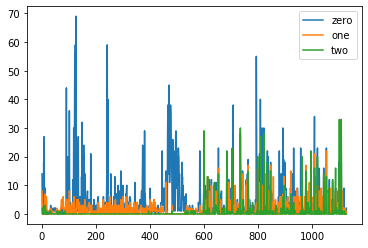

In [22]:
df_fault_severity_from_location.plot()

La gráfica anterior muestra la frecuencia de "fault_severity" por "location".
Se puede observar que para "locations" por debajo de ~ 580 los "fault_severity"
que predominan son aquellos con ninguna falla (azul-zero), seguidos por los 
de unas pocas fallas (naranja-one) y al final los correspondientes a muchas 
fallas (verde-two). Para valores mayores a 580 de "location", las frecuencias 
se empalman. Estos dos comportamientos indican que el hecho de considedad 
únicamente la variable "location" para generar un modelo predictivo puede generar 
resultados con gran error para "locations" mayores a 580 y con menor error 
para valores menores.

# Primer modelo predictivo

Con el objetivo de tener un modelo predictivo preliminar utilizando la 
variable "locations", acontinuación se realizara un modelo predictivo 
con arboles de desición.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
preliminary_model = DecisionTreeClassifier(random_state=1)

In [25]:
X = train.location
y = train.fault_severity
X = X.to_numpy().reshape(-1, 1)

In [26]:
preliminary_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [27]:
# Ahora es hora de predecir aplicando el modelo a los datos "test"
val_X = test.location
val_X = val_X.to_numpy().reshape(-1, 1)
val_y = preliminary_model.predict(val_X)

In [28]:
def get_prob(val_y,name):
    categorical_result=[]
    for val in val_y: 
        if(val==0):
            categorical_result.append([1,0,0])
        elif (val==1):
            categorical_result.append([0,1,0])
        else:
            categorical_result.append([0,0,1])            
    r=pd.DataFrame(categorical_result, columns=['predict_0','predict_1','predict_2'])
    r.to_csv(name+'.csv')
    return r

In [29]:
loc_only=get_prob(val_y,'location_only')

In [30]:
accuracy_score(pd.DataFrame(preliminary_model.predict(X)),y)

0.7217179244004878

# Segundo modelo predictivo (árboles de decisión)

### Uniendo tablas para obtener propiedades

In [31]:
# Uniendo tablas para test
ntest = test
ntest=ntest.join(event_type.set_index('id'), on='id').join(severity_type.set_index('id'), on='id').join(resource_type.set_index('id'), on='id').join(log_feature.set_index('id'), on='id')
val_X=ntest[['location', ' event_type', 'severity_type',' resource_type', 'log_feature', 'volume']]

In [32]:
# Uniendo tablas para train
ntrain = train[['id','fault_severity','location']]
n1=ntrain.join(event_type.set_index('id'), on='id').join(severity_type.set_index('id'), on='id').join(resource_type.set_index('id'), on='id').join(log_feature.set_index('id'), on='id')

In [33]:
# Vamos a separa los datos en (X,y) de train
X=n1[['location', ' event_type', 'severity_type',' resource_type', 'log_feature', 'volume']]
y=n1[['fault_severity']]

In [34]:
# Creando modelo DecisionTreeClassifier
model_all_data = DecisionTreeClassifier(random_state=1)

In [35]:
# Entrenando modelo
model_all_data.fit(X,y.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [36]:
# Predición sobre 'test'
val_y=model_all_data.predict(val_X)

In [37]:
# Poniendo las predicciones dentro de un DataFrame
predic_df=pd.DataFrame(data=val_y, columns=["fault_severity"])

In [38]:
ntest['fault_severity']=predic_df

In [39]:
ntest

,id,location,event_type,severity_type,resource_type,log_feature,volume,fault_severity
0,11066,481,35,2,2,230,24,0
0,11066,481,35,2,2,310,28,0
0,11066,481,35,2,2,228,20,0
0,11066,481,35,2,2,308,26,0
0,11066,481,34,2,2,230,24,0
...,...,...,...,...,...,...,...,...
11170,9886,438,35,1,2,219,1,0
11170,9886,438,34,1,2,301,1,0
11170,9886,438,34,1,2,221,1,0
11170,9886,438,34,1,2,134,1,0


In [40]:
my_predicted_data = ntest[['id','location','fault_severity']]

In [41]:
sol_1=my_predicted_data.groupby(['id']).mean().reset_index()

In [42]:
other = test[['id']]
fin=other.join(sol_1.set_index('id'),on='id')

In [43]:
loc_only=get_prob(fin['fault_severity'],'all_features')

In [44]:
# Obtención de las probabilidades
predict_test=model_all_data.predict_proba(val_X)
predicted_df    = pd.DataFrame(predict_test,columns=['predict_0', 'predict_1', 'predict_2'])

In [45]:
predicted_df['id'] = ntest['id'].values

In [46]:
new_submission_data=predicted_df.groupby(['id']).mean()

In [47]:
new_submission_data['id']=new_submission_data.index

In [48]:
new_submission_data=new_submission_data[['id','predict_0','predict_1','predict_2']]

In [49]:
new_submission_data.to_csv('submission.csv',index=False,header=True)

In [50]:
accuracy_score(pd.DataFrame(model_all_data.predict(X)),y)

0.9252736945940264

In [51]:
0.9252413525445108

0.9252413525445108

# Tercer modelo (logistic regression)

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y.fault_severity.values)

/home/jogabell/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_log_reg_predicted = logreg.predict(val_X)

In [54]:
#loc_only=get_prob(fin['fault_severity'],'all_features') 
len(y_log_reg_predicted)

84584

In [55]:
def get_DF_id_fault_severity(y_predicted):
    # Copiando id en nuevo DF
    otra = pd.DataFrame(ntest['id'],columns=['id'])
    # Agregando 'fault_severity' predichos en el DF
    otra['fault_severity'] = y_predicted
    # Creando DF (res) con 'id' y 'fault_severity' predichos en el DF
    res=otra.groupby(['id']).mean().reset_index()
    return res

In [56]:
df_log_reg=get_DF_id_fault_severity(y_log_reg_predicted)

In [57]:
r_log_reg=get_prob(df_log_reg['fault_severity'],'log_regression')

#### Accuracy score

In [58]:
accuracy_score(pd.DataFrame(logreg.predict(X)),y)

0.5778068856223418

# Model Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_final = RandomForestClassifier(n_estimators=2000)
#random_final = RandomForestClassifier(max_depth= 3,
#                                      min_samples_leaf= 150,
#                                      min_samples_split= 300,
#                                      n_estimators= 500)

In [ ]:
random_final.fit(X,y.values.ravel())

In [ ]:
pred_fin = random_final.predict(val_X)

In [ ]:
accuracy_score(pd.DataFrame(random_final.predict(X)),y)

In [71]:
# Obtención de las probabilidades
predict_test    = random_final.predict_proba(val_X)
predicted_RANDOM_FOREST    = pd.DataFrame(predict_test,columns=['predict_0', 'predict_1', 'predict_2'])
predicted_RANDOM_FOREST['id'] = ntest['id'].values
new_submission_data=predicted_RANDOM_FOREST.groupby(['id']).mean()

new_submission_data['id']=new_submission_data.index
new_submission_data=new_submission_data[['id','predict_0','predict_1','predict_2']]
new_submission_data.head()

,id,predict_0,predict_1,predict_2
id,,,,
2,2,0.870577,0.127602,0.001821
3,3,0.408732,0.372174,0.219094
4,4,0.590090,0.288123,0.121787
7,7,0.457039,0.330501,0.212460
9,9,0.358368,0.277821,0.363811


In [72]:
new_submission_data.to_csv('submission_random_forest_n_estimators_2000_5.csv',index=False,header=True)